<a href="https://colab.research.google.com/github/ginttone/multi_machinelearning/blob/master/7_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

클러스터링:

y값없는 데이터가 많다 결칩치를 채우기 위해 y값을 age로 한다 나머지를 x값으로 돌리고 리니어레그레이션로 교육시킨다 

중심a,b,c가 있다고 가정하면 a,b,c가 찍어진 부분에서 본이과 가까운애들끼리 그룹핑을한다 

실시간으로 데이터가 모이고 그 실시간동안 값을 낼때 유리하게 쓰인다

[csv_file_](https://archive.ics.uci.edu/ml/machine-learning-databases//00292/Wholesale%20customers%20data.csv
) 파일 1개 다운받음


코랩,케글:리눅스 베이스


In [1]:
!ls #리눅스에서 샘플데이터들 가져옴

sample_data


In [2]:
#ls는 리스트 - l 은 옵션(리스트); 리스트로 보여주는데 자세한 리스트로 보여줘

!ls -l 

#d<- 디렉토리(폴더)

total 4
drwxr-xr-x 1 root root 4096 Jun 15 13:37 sample_data


In [3]:
!pwd  #지금 content 위치에있다

/content


In [4]:
#./내가 원하는 디렉토리 명

!ls -l ./sample_data

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jun 15 13:37 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jun 15 13:37 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jun 15 13:37 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jun 15 13:37 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [5]:
!ls -l ./

total 4
drwxr-xr-x 1 root root 4096 Jun 15 13:37 sample_data


In [8]:
import pandas as pd
df = pd.read_csv('./Wholesale_customers_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
X=df.iloc[:,:]
X.shape

(440, 8)

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)

In [12]:
from sklearn import cluster
kmeans=cluster.KMeans(n_clusters=5)

In [13]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
#각 라인이 어떻게 분류되어있는지 표시해줌
kmeans.labels_

#x 를 fit해서 y만들어주는 작업 

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 4, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 4, 2, 2, 0, 0, 2, 2, 0, 0, 4, 2, 0, 0, 2, 4, 2, 2, 0, 4,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 4, 4, 0,
       0, 0, 0, 0, 4, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2,

In [15]:
#없던 label 붙히기 = 확인
df['label']=kmeans.labels_
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


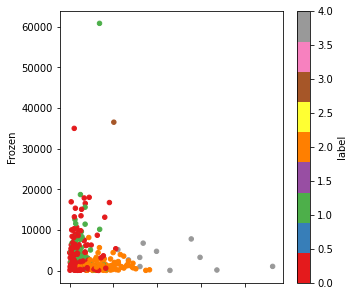

In [16]:
# 구성 된 데이터로 스케토플롯(산점도)으로 꾸려봄
df.plot(kind='scatter', x='Grocery',y='Frozen', c='label', cmap='Set1', figsize=(5,5))

In [17]:
'''
for ...
  ifdf[-(df['label']==0)|(df['label']==4)]  :

for문 안에 if 조건절 이것을 한번에 하는게 mask방식 
'''
dfx=df[-((df['label']==0)|(df['label']==4))] 
df.shape, dfx.shape

((440, 9), (218, 9))

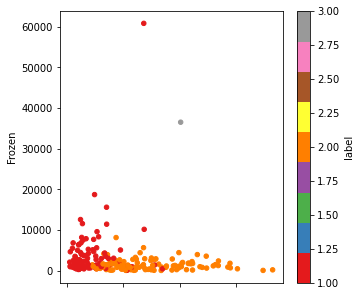

In [18]:
dfx.plot(kind='scatter', x='Grocery',y='Frozen', c='label', cmap='Set1', figsize=(5,5))

In [19]:
df.to_excel('./wholesale.xls')